<img src="costarica_dibujo.PNG" width=300 align="center">

<h1 align="center">Taller de Introducción al  Aprendizaje Automático con Aplicaciones a Focalización de Políticas Públicas</h1> 

<h3 align="center">Alejandro Noriega</h3>
<h3 align="center">Luis Fernando Cantú Díaz de León</h3>
<h3 align="center">Costa Rica, 2019</h3> 


## <a name="contenidos"></a>Índice de contenidos

Bloque III: Paradigma Predictivo y Aprendizaje Automático

3.1 [Regresion Lineal con Scikit Learn](#rl-sklearn)

3.2 [Precisión Dentro de Muestra vs. Fuera de Muestra](#precision_dentro_fuera)

3.3 [Regularización Controlando el Número de Variables](#regularizacion)

3.4 [Primer Modelo de Aprendizaje Automático: Regularización con el Lasso](#primer-modelo)

In [1]:
######## Importamos librerías

# Manejo de tablas de datos
import pandas as pd  

# Manejo matemático de variables
import math
import numpy as np
import random
random.seed(51)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Otras librerias
from IPython.display import display, HTML


<img src="costarica_dibujo.PNG" width=300 align="center">

<h1 align="center">Bloque III: Paradigma Predictivo y Aprendizaje Automático</h1> 


En este bloque comenzaremos a clasificar a los hogares por medio de Python y `sklearn`. Específicamente, entrenaremos un modelo que nos sirva para determinar si un hogar se encuentra en situación de pobreza o no.

En **aprendizaje automático** se pueden utilizar varios modelos, desde modelos lineales, como la regresión logística, hasta modelos que buscan interacciones no explícitas. El usuario así puede permitirse modelos de mucha más complejidad pues el paradigma predictivo ajusta la complejidad de los modelos de forma empírica, de acuerdo a la cantidad y calidad de datos que se tengan. 

## <a name="rl-sklearn"></a> 3.1 Regresión Lineal con SkLearn

[Regresar a índice](#contenidos)

Primero, importaremos `sklearn`, una librería que permite implementar la regresión logística de manera simple (así como una amplia gama de métodos de aprendizaje automático que usaremos después).

In [2]:
# Primero, importaremos una librería que permite implementar la regresión logística de manera simple
from sklearn.linear_model import LogisticRegression

Por ahora, para demostrar con claridad los conceptos de **sobrejuste, precisión dentro y fuera de muestra**, trabajaremos con un subconjunto pequeño de hogares. 

En particular, cargamos la **tabla filtrada de hogares generada en el Bloque II**: hogares (renglones) urbanos de Brunca, con al menos un miembro menor de 12 años.

In [3]:
# Cargamos la base
df_filtrada=pd.read_csv("../datos/tabla_filtrada.csv")
#Dividimos variables independientes de variable dependiente

print("Número total de hogares  en el subgrupo :", len(df_filtrada) )
print("Número total de columnas en la tabla    :", len(df_filtrada.columns) )

Número total de hogares  en el subgrupo : 159
Número total de columnas en la tabla    : 128


Dentro de la información de la tabla: 

- Definimos como **variables/ covariados ```X```** de la regresión a las variables "aprobadas" para inferir el ingreso (cargadas en ```vars_permitidas```). 
- Definimos como **variable objetivo ```y```** a la variable indicadora de pobreza ¨pobreza¨.

In [4]:
# Variables permitidas
vars_permitidas = ['V2A1','V8','V9','V18A1','V18B1','V18F1','V18G1','V18Q1','V18J1','V18L1','V18M1','R4H1','R4H2','R4H3','R4M1','R4M2','R4M3','R4T1','R4T2','R4T3','TamHog','TamViv','A5_mean','A5_sd','Escolari_mean','Escolari_sd','REZ_ESC_mean','REZ_ESC_sd','ZONA_2','V1_2','V1_3','V1_4','V1_5','V1_6','V2A_2','V2A_3','V2A_4','V2A_5','V3_1','V3_2','V3_3','V3_4','V3_5','V3_6','V3_7','V3_8','V4_1','V4_2','V4_3','V4_4','V4_5','V5_1','V6_1','V6_2','V6_3','V6_4','V6_5','V7A_2','V7A_3','V7B_2','V7B_3','V7C_2','V7C_3','HacDor_2','HacApo_2','V11_1','V11_2','V11_3','V12_2','V12_3','V12_4','V12_5','V12_6','V12_7','V13A_1','V13A_2','V13A_3','V13A_4','V13A_5','V14A_1','V15_1','V15_2','V15_3','V15_4','V15_5','V15_6','V16_1','V16_2','V16_3','V17A_2','V17A_3','V17A_4','V17A_5','V17A_6','V18A_2','V18B_4','V18C_6','V18D_8','V18F_4','V18G_6','V18Q_2','V18J_4','V18L_8','V18M_2','V18O_4','V18P_6','V19_1','V19C_0','V19C_1','ZONA']

# Variables X, y
X = df_filtrada[ vars_permitidas ]
y = df_filtrada['pobreza']

Ahora entrenaremos nuestra primera regresion logística. 

- La entrenamos usando su función **```.fit()```**. 
- Una vez entrenada, podemos hacer predicciones y obtener el puntaje de precisión utilizando su función **```.score(X,y)```**. 

Evaluaremos el desempeño utilizando las dos métricas más sencillas: la precisión, y su inverso, el **error de clasificación**, que representa el porcentaje de hogares clasificados incorrectamente. En el siguiente bloque del curso ahondaremos en métricas evaluación del desempeño.

In [5]:
# Generamos un clasificador de regresión logística
lr = LogisticRegression(solver = "liblinear")

# Entrenamos el clasificador con nuestras variables indpendiendientes y dependientes
lr.fit(X, y)

# Obtenemos el error de clasificación: porcentaje de hogares clasificados incorrectamente
sc =  lr.score(X, y)
err = 1 - sc

print("El porcentaje de hogares clasificado incorrectamente es: ", str(round(err*100, 1)), "%" )

El porcentaje de hogares clasificado incorrectamente es:  25.8 %


## <a name="precision_dentro_fuera"></a>3.2 Precisión _dentro de muestra_ vs. _fuera de muestra_

[Regresar a índice](#contenidos)

Podríamos pensar que ya tenemos un predictor muy bueno. Sin embargo, es posible que el buen ajuste se haya obtenido debido al gran número de **grados de libertad**, o parámetros, del modelo (en la regresión lineal un grado de libertad es un coeficiente), en relación al **tamaño de muestra**. 

**¿Cómo podemos probarlo?** 

El método para probar el ajuste, subajuste, o sobreajuste de modelos en aprendizaje automático es medir  el desempeño predictivo en una **muestra independiente** a los datos usados para entrenar los parámetros del modelo. De esa forma, si el ajuste estuvo forzado para la primera parte de los datos, y en realidad no era generalizable, el modelo tendrá un mal desempeño fuera de muestra. 

Primero, **dividimos la muestra en entrenamiento y evaluación**. Es importante que esta división sea de forma aleatoría, para tener distribuciones similares en ambas muestras.  Para ello, utilizamos la función de scikit-learn llamada ```train_test_split()```. Por ahora usaremos una división de 70% en entrenamiento y 30% en evaluación.

In [6]:
# Cargamos la función test_train_split 
from sklearn.model_selection import train_test_split

# Dividimos nuestra muestra en conjuntos de entrenamiento y de evaluación
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=0)

<font color="blue">Ejercicio 6. </font> 

**Entrena una regresión logistica** (usando el método ```.fit```) con la muestra de entrenamiento, y obtén e imprime el error de clasificación para la muestra de entrenamiento y la muestra de evaluación. 

In [ ]:
## Su solución

# Genera el clasificador de regresión logística (no tienes que hacer nada adicional aquí)
lr = LogisticRegression()

# Entrena el clasificador con la muestra de entrenamiento


# Obtén el porcentaje de error en la muestra de entrenamiento
err_train=

# Obtén el porcentaje de error en la muestra de evaluación
err_test = 


# Imprime los errores (nada más que hacer aquí)
print("El porcentaje de hogares clasificado incorrectamente, en muestra aparte (o test set), es "+str(round(er_test*100, 0))+"%")
print("El porcentaje de hogares clasificado incorrectamente, en muestra de entrenamiento, es "+str(round(er_train*100, 0))+"%")

# Grafica los errores (nada más que hacer aquí)
plt.bar(0, er_train, label="Error en Muestra de Entrenamiento")
plt.bar(1, er_test, label="Error en Muestra de Evaluación")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

El porcentaje de hogares clasificado incorrectamente en muestra de evaluación, es 33.0%
El porcentaje de hogares clasificado incorrectamente en muestra de entrenamiento, es 22.0%


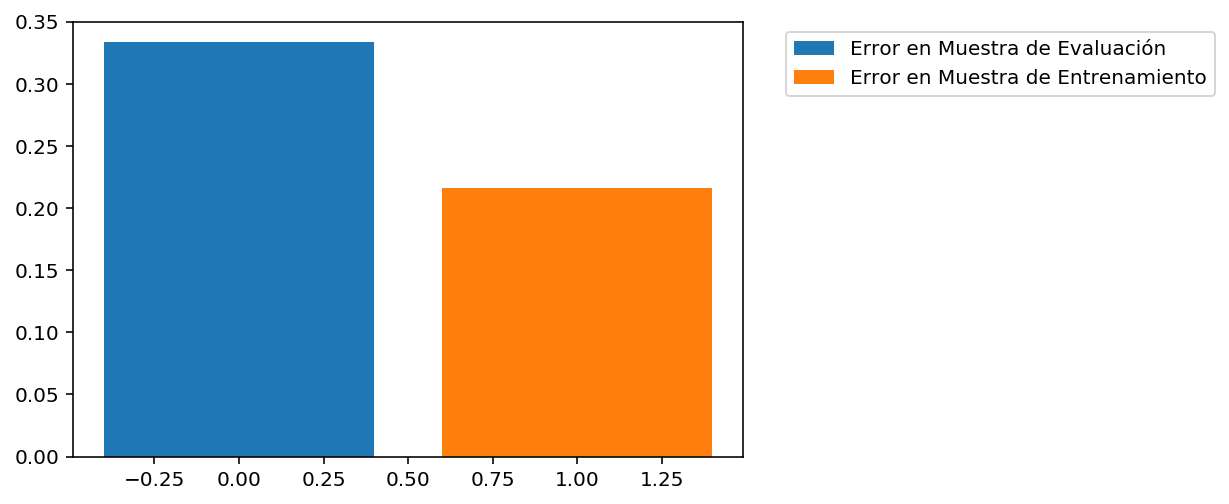

In [7]:
#### Solución

# Generamos clasificador de regresión logística (no tienes que hacer nada adicional aquí)
lr = LogisticRegression(solver = "liblinear")

# Entrenamos el clasificador con la muestra de entrenamiento
lr.fit(X1, y1)

# Obtenemos el porcentaje de error en la muestra de entrenamiento
err_train = 1 - lr.score(X1, y1)

# Obtenemos el porcentaje de error en la muestra de evaluación
err_test =  1 - lr.score(X2, y2)

# Imprimimos los errores (nada más que hacer aquí)
print("El porcentaje de hogares clasificado incorrectamente en muestra de evaluación, es "+str(round(err_test*100, 0))+"%")
print("El porcentaje de hogares clasificado incorrectamente en muestra de entrenamiento, es "+str(round(err_train*100, 0))+"%")

# Graficamos los errores (nada más que hacer aquí)
plt.bar(0, err_test,  label="Error en Muestra de Evaluación")
plt.bar(1, err_train, label="Error en Muestra de Entrenamiento")
plt.legend(bbox_to_anchor=(1.05, 1)); plt.show()

## <a name="regularizacion"></a>3.3 Regularización mediante el control del número de variables

[Regresar a índice](#contenidos)

Los dos elementos principales para controlar el sobreajuste de un modelo, son:
* Aumentar el tamaño de muestra.
* Quitar grados de libertad, parámetros, o complejidad al modelo.

A continuación analizaremos el efecto que tiene **controlar el número de variables** en una regresión logística como método de control de sobreajuste (a.k.a., regularización). Trabajaremos de nuevo con la **tabla completa de hogares**.

In [8]:
# cargamos tabla completa
df = pd.read_csv("../datos/base_por_hogar.csv")

# definimos variables de la regresión
X = df[vars_permitidas].copy()
y = df["pobreza"]

Como hemos visto, el problema de **sobreajuste** se relaciona con la alta dimensionalidad. Los modelos de aprendizaje automático suelen ser tan complejos como uno desee, por lo que es común caer en este problema. 

En la regresión logística, el problema se podría presentar cuando uno agrega demasiadas **variables interactuadas** al modelo. Para visualizar la evolución de los errores en los conjuntos de entrenamiento y evaluación, **agregaremos todas las interacciones de parejas de variables** a nuestra tabla de hogares. El código siguiente genera las interacciones entre las variables.

In [9]:
# Generar interacciones 1-a-1  (~2 min)
for s in range(len(vars_permitidas)):
    print(s, end="\r")
    for k in range(s, len(vars_permitidas)):            # Para cada variable agregamos su producto con todas las variables que la suceden en nuestra lista de variables.
        X[vars_permitidas[s]+"_"+vars_permitidas[k]] = X[vars_permitidas[s]] * X[vars_permitidas[k]]

# resultado: lista de variables interacctuadas
variables_interactuadas = list(X.columns)
random.shuffle(variables_interactuadas)
print("Número de interacciones:", len(variables_interactuadas))

Número de interacciones: 6215


Hay mas de 5,000 interacciones. En nuestra tabla, si una variable corresponde a una interacción, un guión bajo separa las dos variables que lo componen. También tenemos variables cuadráticas, que son la interacción de una variable consigo misma.

Dividimos los datos en muestra de evaluación, y muestra de entrenamiento. En la función, especificamos que queremos que el ```test_size``` de tamaño ```0.3```, es decir, que el 30% de la base se reservará para probar el desempeño de los estimadores. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5676)

#### Evolución de Ajuste para la Regresión Logística

Generamos una función que tiene como objetivo calcular el **desempeño de una serie de modelos con números cada vez más grandes de variables independientes**. Dicha función  recibe como parámetros: las bases de entrenamiento y evaluación, el nombre de las columnas a utilizar para estimar, un estimador, y la serie de cantidades de variables a utilizar.

In [11]:
def return_errors(X_train, y_train, X_test, y_test, variables_interactuadas, start, est):
    currvars = variables_interactuadas[:start]
    est.fit(X_train[currvars], y_train)
    e1 = 1-est.score(X_test[currvars], y_test)
    e2 = 1-est.score(X_train[currvars], y_train)
    return e1, e2

# Calcula el desempeño del estimador para cada número de variables en num_vars 
def desempeno_por_variables(X_train, y_train, X_test, y_test, variables_interactuadas, est, num_vars):
    start, flag = 10, 0
    ers, ers_test = [],[]
    for start in num_vars:
        print(start, end="\r")
        e1, e2 = return_errors(X_train, y_train, X_test, y_test, variables_interactuadas, start, est)
        ers_test.append(e1)
        ers.append(e2)
    return ers, ers_test

# Grafica
def grafica_evolucion_ajuste(ers, ers_test, num_vars):
    plt.figure(figsize=(7,4.5))
    plt.plot(ers, "-o", label="Error en base de entrenamiento")
    plt.plot(ers_test, "-o", label="Error en base de evaluación")
    plt.xticks(np.arange(len(num_vars)), num_vars, rotation='vertical')
    plt.ylabel("error"); plt.xlabel("número de variables");
    plt.ylim((.13, .225))
    plt.legend(); plt.show()
    

Ahora usamos las funciones para calcular los resultados, y visualizamos los mismos.  

- Nota 1: por lo pronto usamos una  regresión logística tradicional, sin regularización. El parámetro `C=1e9` indica que no hay regularización.
- Nota 2: toma ~5 min.

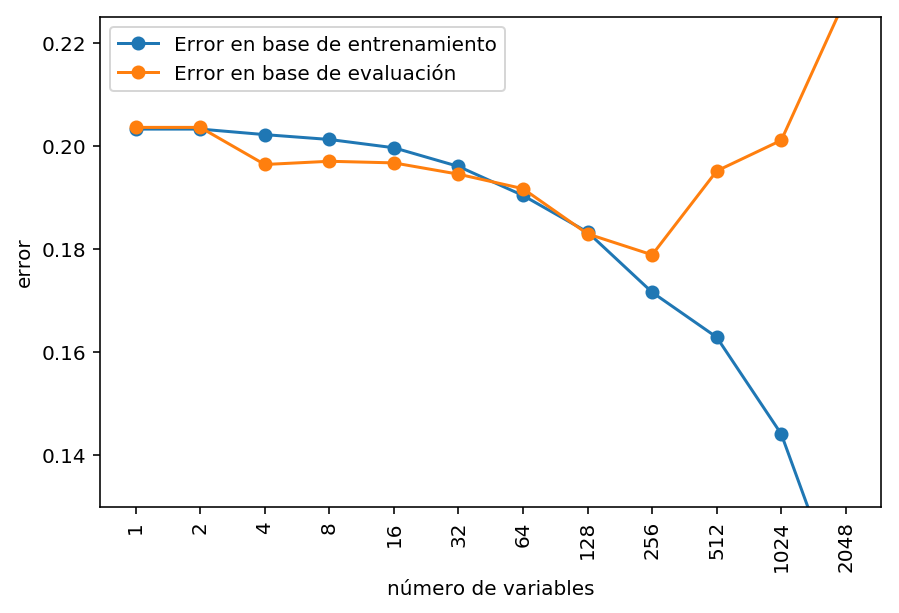

In [12]:
# Declarar un estimador
est = LogisticRegression(penalty="l1", C=1e9, solver="liblinear", random_state= 456)

# Número de variables a incluir
num_vars = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]     #, 4096]

# Calcular resultados para cada número de variables (toma ~5 min)
errs, errs_test = desempeno_por_variables(X_train, y_train, X_test, y_test, 
                                          variables_interactuadas, est, num_vars)
# Grafica resultados
grafica_evolucion_ajuste(errs, errs_test, num_vars)

La gráfica visualiza la evolución del ```error``` del estimador en la base de entrenamiento y en la de evaluación. 

Nota la **dinámica de subajuste, ajuste, y sobreajuste**. Al principio, agregar más variables reduce el desempeño de ambos errores. Posteriormente, el desempeño en la base de evaluación se estanca y sólo se reduce el error en la base de entrenamiento. Lo anterior denota sobreajuste. Las consecuencias negativas del sobreajuste se observan al final, donde más allá de estancarse, el desempeño en el conjunto de evaluación se ve perjudicado al agregar más variables. 

<font color="blue"> Ejercicio 7. </font>  Responde brevemente a las siguientes preguntas:

- **¿Qué desventajas le ves a este método para controlar el sobreajuste?**


*(Haz doble click aquí para anotar tu respuesta)*

- **¿Cómo lo comparas con un método de eliminación de variables step-wise?**

*(Haz doble click aquí para anotar tu respuesta)*

- En base a lo que has aprendido en las presentaciones, **¿se te ocurren algunas mejoras o métodos alternos para controlar el sobreajuste de la regresión?**

*(Haz doble click aquí para anotar tu respuesta)*

## <a name="primer-modelo"></a>3.4 Primer Modelo de Aprendizaje Automático: Regularización con el Lasso

[Regresar a índice](#contenidos)

Hay varias formas de controlar el problema de sobreajuste. La más intuitiva es reduciendo el número de variables. Sin embargo, una importante familia de métodos de apredizaje automático, los **métodos de regularización**, modulan la complejidad de los modelos introduciendo restricciones o penalizaciones a los problemas de optimización de errores planteados por cada modelo.

Además del Lasso, otros métodos de esta familia son las regresiones Ridge y las máquinas de soporte vectorial.

El parámetro ```penalty='l1'``` indica que queremos usar una regresión Lasso (norma L1).  El **parámetro** ```C``` **es inversamente proporcional a la regularización**. Así, si `C` vale poco, habrá mucha regularización. Si ```C``` es grande (`C=1e9`, como en el ejercicio anterior), no habrá regularización. 

<font color="blue">Ejercicio 8:</font> 

Crea una función, que:
+ Reciba a `C` como parámetro de regularización, 
+ calcule los resultados de la evolución del ajuste de la regresión logística (puedes usar el código de la celda anterior), 
+ imprima la gráfica generada en la celda anterior. 

Únicamente hay que llenar los pedazos faltantes de código. Una vez creada, usa tu nueva función con el parámetro `C=.01`.

In [ ]:
## Su solución

def evolucion_ajuste_regresion_lasso(C):
    
    # declarar estimador
    

    # número de variables a incluir
    num_vars = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

    # calcular resultados para cada número de variables (toma ~5 min)
    errs, errs_test = desempeno_por_variables(X_train, y_train, X_test, y_test, 
                                              variables_interactuadas, est, num_vars)
    # grafica resultados
    grafica_evolucion_ajuste(errs, errs_test, num_vars)
    

In [ ]:
# Usa aquí la función, con el parámetro C=.01


In [13]:
## Solución

def evolucion_ajuste_regresion_lasso(C):
    
    # declarar estimador
    est = LogisticRegression(penalty="l1", C=C, solver="liblinear", random_state= 458)

    # número de variables a incluir
    num_vars = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]  #, 4096]

    # calcular resultados para cada número de variables (toma ~5 min)
    errs, errs_test = desempeno_por_variables(X_train, y_train, X_test, y_test, 
                                              variables_interactuadas, est, num_vars)
    # grafica resultados
    grafica_evolucion_ajuste(errs, errs_test, num_vars)


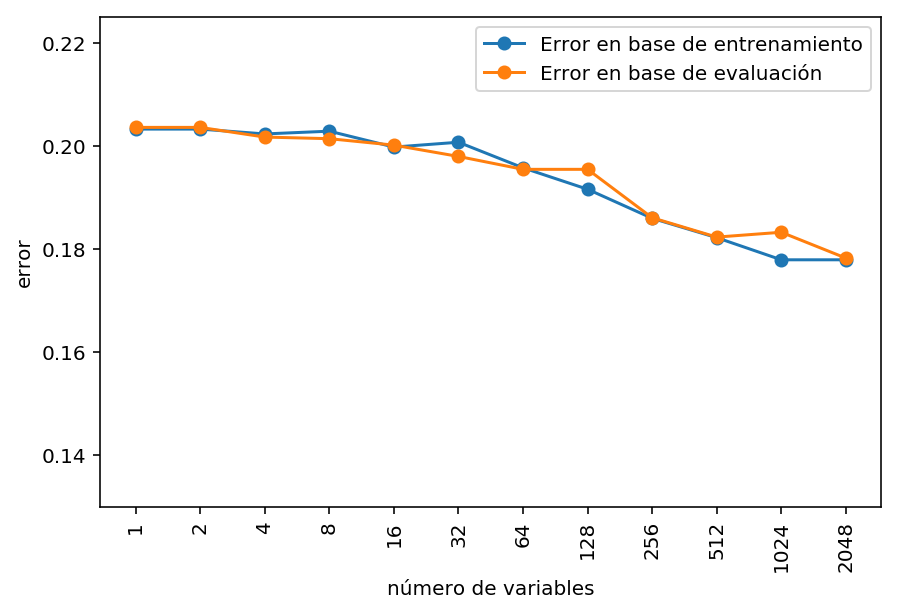

In [14]:
# Usa aquí la función, con el parámetro C=.01
evolucion_ajuste_regresion_lasso(.01)

<font color="blue">Ejercicio 9:</font> 

Por último, obtendremos los resultados para **varios parámetros de regularización** y los visualizaremos:

- Escribe un **ciclo** `for` que aplique tu nueva función para cada uno de los siguientes valores del párametro C de regularización:   `Cs = [1e9, .01, .001]`

- ¿Qué observas conforme incrementamos la regularización?

In [ ]:
# Tu solución:

# lista de valores de C
Cs = 

# for loop

    # llama a tu función


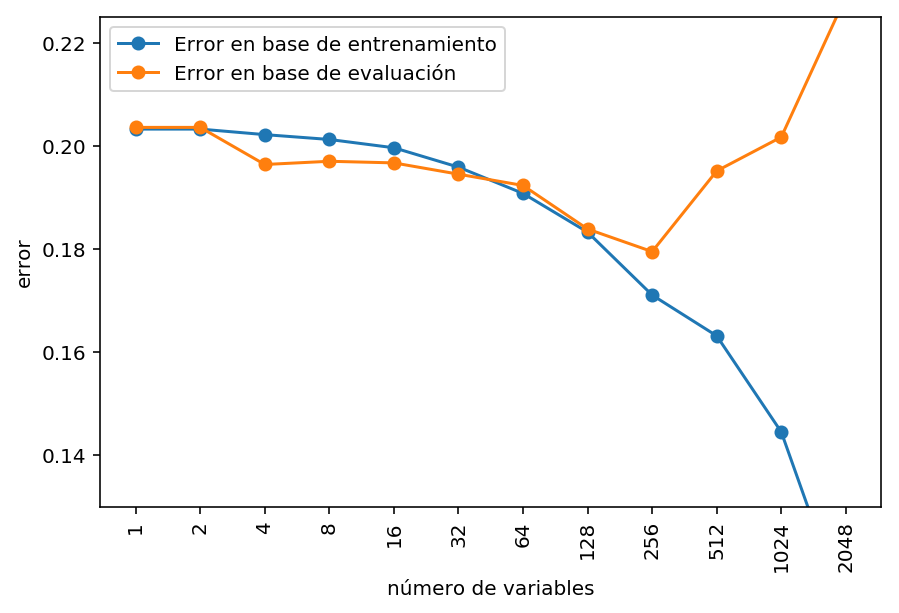

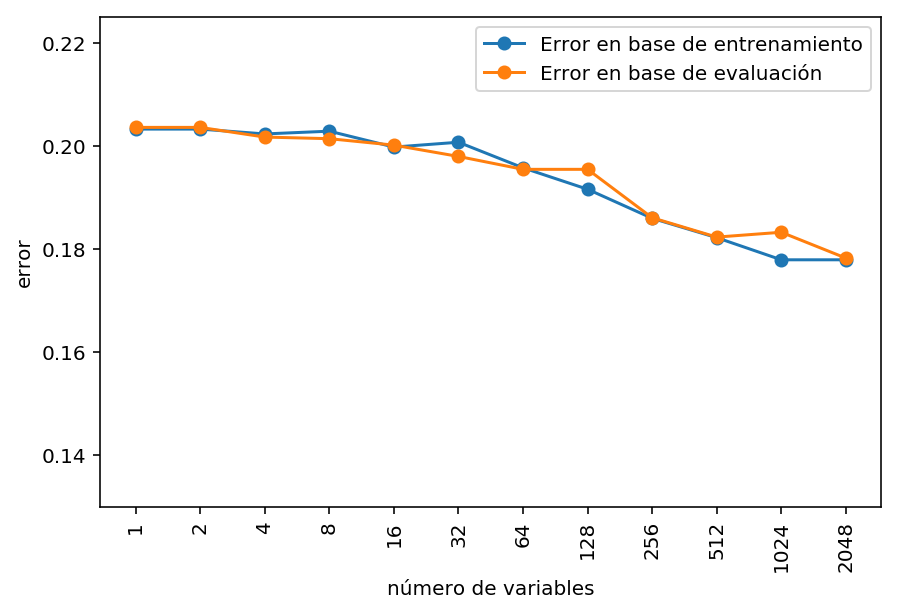

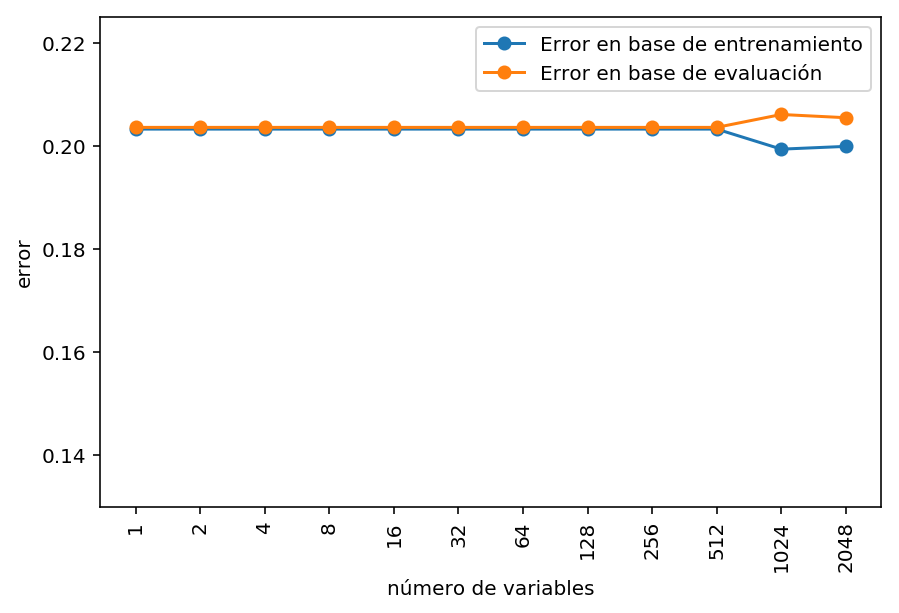

In [15]:
# Solución:

# lista de valores de C
Cs = [1e9, 0.01, .00001]

# for loop
for C in Cs:
    # llama a tu función
    evolucion_ajuste_regresion_lasso(C)

### Escogiendo el Parámetro de Complejidad C en el Lasso

Las funciones de abajo implementan un **ciclo de busqueda del parámetro C** que mejor desempeño fuera de muestra otorgue, cuando se usan 4,096 de las variables interactuadas.

**Este ciclo demora aproximadamente 30 minutos** en correr, por lo que hemos pre-computado los resultados, mismos que desplegamos debajo.

0.0001
0.001
0.01
0.1
1


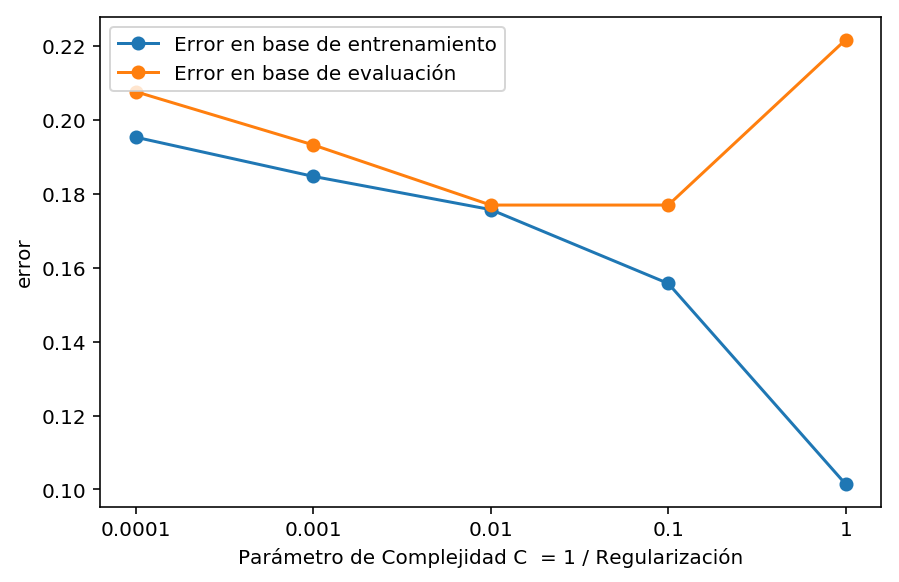

In [16]:

# calcula el desempeño del estimador para cada numero de variables en num_vars 
def evolucion_desempeno_lasso(X_train, y_train, X_test, y_test, Cs):
    X_train = X_train.iloc[:, 0:4097]
    X_test = X_test.iloc[:, 0:4097]
    ers, ers_test = [],[]
    for C in Cs:
        est = LogisticRegression(penalty="l1", C=C, solver="liblinear", random_state= 456)
        est.fit(X_train, y_train)
        e1 = 1-est.score(X_test, y_test)
        e2 = 1-est.score(X_train, y_train)
        ers_test.append(e1)
        ers.append(e2)
        print(C)
    grafica_evolucion_lasso(ers, ers_test, Cs)
    return ers, ers_test, Cs

# grafica
def grafica_evolucion_lasso(ers, ers_test, Cs):
    plt.figure(figsize=(7,4.5))
    plt.plot(ers, "-o", label="Error en base de entrenamiento")
    plt.plot(ers_test, "-o", label="Error en base de evaluación")
    plt.xticks(np.arange(len(Cs)), Cs)
    plt.ylabel("error"); plt.xlabel("Parámetro de Complejidad C  = 1 / Regularización");
    #plt.ylim((.05, .2)); 
    plt.legend(); 
    plt.savefig('grafica_evolucion_lasso_full_'+str(len(Cs))+'.png', format='png', dpi=300)
    plt.show()

# búsqueda de parametro C
vs = variables_interactuadas[:]
Cs = [0.0001, 0.001, 0.01, .1, 1]
ers, ers_test, Cs = evolucion_desempeno_lasso(X_train[vs], y_train, X_test[vs], y_test, Cs=Cs)

La siguiente gráfica muestra el desempeño de nuestro algoritmo, utilizando todas las variables interactuadas, para diferentes valores de `C`.

<img src="grafica_evolucion_lasso_full_5.png" width=800 align="center">